BIPARTITE GRAPH WITH DEGREE OF CENTRALITY

The graph is bipartite.


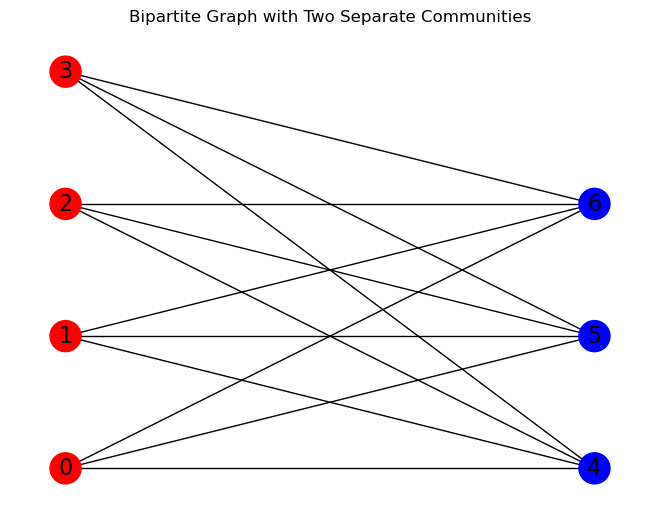

Degree Centrality:
Node 0: 0.50
Node 4: 0.67
Node 5: 0.67
Node 6: 0.67
Node 1: 0.50
Node 2: 0.50
Node 3: 0.50


In [14]:
!pip install matplotlib networkx

import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

def is_bipartite(graph):
    color = {}
    for node in graph:
        if node not in color:  # If not colored yet
            # Start BFS
            queue = deque([node])
            color[node] = 0  # Color the first node with 0
            while queue:
                current = queue.popleft()
                for neighbor in graph[current]:
                    if neighbor not in color:  # If the neighbor hasn't been colored
                        color[neighbor] = 1 - color[current]  # Color with opposite color
                        queue.append(neighbor)
                    elif color[neighbor] == color[current]:  # If the neighbor has the same color
                        return False, {}  # Not a bipartite graph
    return True, color  # All nodes colored without conflict

def draw_graph(graph, colors):
    G = nx.Graph()
    
    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Create a color map for visualization
    color_map = []
    for node in G.nodes():
        color_map.append('red' if colors.get(node) == 0 else 'blue')

    # Manually position nodes: left for community A, right for community B
    pos = {}
    community_A_size = len([n for n in graph if n in community_A])
    community_B_size = len([n for n in graph if n in community_B])

    # Community A positions (left)
    for i, node in enumerate(community_A):  # Community A
        pos[node] = (-1, i)  # x = -1 (left), y = index
    
    # Community B positions (right)
    for i, node in enumerate(community_B):  # Community B
        pos[node] = (1, i)  # x = 1 (right), y = index

    # Draw the graph
    nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=16)
    plt.title("Bipartite Graph with Two Separate Communities")
    plt.show()

    return G  # Return the graph for further analysis

# Example usage
if __name__ == "__main__":
    # Define two separate communities with flexible sizes
    community_A = [0, 1, 2, 3]  # First community 
    community_B = [4, 5, 6,]      # Second community
    
    # Creating the bipartite graph
    graph = {}
    
    # Connect nodes between communities
    for a in community_A:
        graph[a] = community_B  # Connect every node in community A to all in community B
    
    for b in community_B:
        graph[b] = community_A  # Connect every node in community B to all in community A
    
    is_bipartite_result, colors = is_bipartite(graph)
    
    if is_bipartite_result:
        print("The graph is bipartite.")
        G = draw_graph(graph, colors)

        # Calculate and display degree centrality
        degree_centrality = nx.degree_centrality(G)
        print("Degree Centrality:")
        for node, centrality in degree_centrality.items():
            print(f"Node {node}: {centrality:.2f}")
    else:
        print("The graph is not bipartite.")
